In [10]:
import numpy as np
import pandas as pd
import operator

Načitanie trénovacej vzorky:

In [11]:
train_data = pd.read_csv('../input/train_data.csv')
X = train_data['job_description']
y = train_data['category']

Prvou funkciou na jednoduché spracovanie textu. Pomocou funkcie simple_preprocess sa text konvertuje do lowercase, odstránia príliš kratké a nie-abecedné slová. Odstránia sa tzv. stop words a slová sa pomocou stemmeru konvertuju na ich koreň.

In [12]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from gensim.utils import simple_preprocess

stemmer = SnowballStemmer('english')
en_stopwords = stopwords.words('english')
stops = set(stopwords.words('english'))

def stem_preprocess(texts):
    texts = simple_preprocess(texts, deacc=True, min_len=3)
    texts = [word for word in texts if word not in stops]
    texts = [stemmer.stem(word) for word in texts]
    return " ".join(texts)

In [4]:
X_stemmed = X.apply(lambda x: stem_preprocess(x))

Príklad toho ako vyzerá text po stemmatizácií:

In [5]:
X_stemmed[0]

'appli ref ifa administr london nationwid wealth manag firm current recruit ifa administr join team london work alongsid high experienc team paraplann except advis role support day day administr busi includ board process client letter valuat chase outstand inform encourag progress toward diploma qualif full studi support provid ideal candid alreadi gain least yearsa experi wealth manag industri look progress challeng role pleas send ursula sloan financi divis'

Druhým prístupom bolo nameisto stemmatizácií použiť lemmatizáciu. Vyskúšal som oba prístupy a lemmatizácia sa ukázala ako úspešnejšia:

In [6]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

def lematize_preprocess(texts):
    texts = simple_preprocess(texts, deacc=True, min_len=3)
    texts = [word for word in texts if word not in stops]
    texts = [wordnet_lemmatizer.lemmatize(word) for word in texts]
    return " ".join(texts)

In [7]:
X_lemmatized = np.array(X.apply(lambda x: lematize_preprocess(x)))

In [13]:
train_data.head()

,Unnamed: 0,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
0,8117,finance jobs,London,Accountancy Divisions Limited,uk,reed,Apply now REF: US/7104 IFA Administrator Lond...,NaN,IFA Administrator,"Permanent, full-time",2/28/2018,"£27,000 - £32,000 per annum",South East England
1,46176,leisure tourism jobs,London,Halmer Recruit,uk,reed,Apply now Job Title: Travel Consultant Locati...,Required skills Europe Sales Caribbean Far Ea...,Leisure Travel Consultant,"Permanent, full-time",2/28/2018,"£45,000 per annum",South East England
2,48426,fmcg jobs,Telford,Proactive Personnel,uk,reed,Apply now An exciting opportunity for a forwa...,NaN,Control Systems Engineer,"Permanent, full-time",3/2/2018,"£35,000 - £45,000 per annum",Shropshire
3,40952,accountancy jobs,Ivybridge,Hays Specialist Recruitment Limited,uk,reed,Apply now Accounts Assistant / Plymouth Hays ...,NaN,Accounts Assistant,"Permanent, full-time",2/27/2018,"£16,000 - £20,000 per annum",Devon
4,18707,education jobs,Maidstone,KM Education Recruitment Ltd,uk,reed,Apply now KM Recruitment is a specialist UK w...,NaN,Health and Social Care Assessor,"Permanent, full-time",2/13/2018,"£22,500 - £26,000 per annum",Kent


Príklad toho ako vyzerá text po lemmatizácií:

In [14]:
X_lemmatized[0]

'apply ref ifa administrator london nationwide wealth management firm currently recruiting ifa administrator join team london working alongside highly experienced team paraplanners exceptional adviser role supporting day day administration business including boarding process client letter valuation chasing outstanding information encouraged progress towards diploma qualification full study support provided ideal candidate already gained least yearsa experience wealth management industry looking progressive challenging role please send ursula sloan financial division'

In [15]:
def numOfUniqueWords(X):
    unique_words = set()
    for row in X:
        for word in row.split():
            unique_words.add(word)
    return len(unique_words)

Pre zaujímavosť je dobré si porovnať ako oba prístupy redukujú celkový počet slov v trénovacej vzorke. 

In [16]:
print('raw:', numOfUniqueWords(X))
print('stemmed:', numOfUniqueWords(X_stemmed))
print('lemmatized: ', numOfUniqueWords(X_lemmatized))

raw: 330578
stemmed: 79764
lemmatized:  89786


Tiež je zaujímavé vidieť, ktoré slová sa vyskytujú najčastejšie v pôvodnom texte, stemmatizovanom a lemmatizovanom.

In [17]:
import operator 
def printNMostCommonWords(X, n):
    word_dict = dict()
    for job in X:
        for word in job.split(' '):
            if word not in word_dict:
                word_dict[word] = 0
            else:
                word_dict[word] += 1

    sorted_word_dict = sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_word_dict[:n]

In [18]:
print('raw: \n',printNMostCommonWords(X, 20))
print('stemmed: \n',printNMostCommonWords(X_stemmed, 20))
print('lemmatized: \n',printNMostCommonWords(X_lemmatized, 20))

raw: 
 [('and', 544972), ('to', 394605), ('the', 347262), ('a', 277754), ('of', 269983), ('in', 189315), ('for', 162322), ('with', 148524), ('will', 114305), ('you', 106661), ('is', 106537), ('be', 106523), ('are', 90380), ('on', 81760), ('', 79999), ('an', 77304), ('as', 70579), ('your', 60295), ('-', 59124), ('have', 58341)]
stemmed: 
 [('work', 110944), ('manag', 84010), ('recruit', 66094), ('experi', 65941), ('team', 64238), ('role', 63797), ('appli', 63586), ('busi', 56100), ('client', 53038), ('servic', 51701), ('custom', 44777), ('develop', 43917), ('opportun', 41731), ('support', 41641), ('skill', 41016), ('within', 40704), ('requir', 40011), ('look', 37354), ('compani', 35640), ('includ', 34458)]
lemmatized: 
 [('experience', 65841), ('team', 64215), ('role', 63796), ('work', 60666), ('apply', 60047), ('client', 53035), ('recruitment', 52402), ('business', 51837), ('service', 50601), ('working', 48010), ('customer', 44519), ('opportunity', 41723), ('within', 40704), ('skill', 

Je tiež nutné konvertovať kategórie do čísel. Pomocou LabelEncoder sa každej kategórií priradí id čislo.

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(y)
print(label_encoder.classes_)
print(set(y_labels))

['accountancy jobs' 'accountancy qualified jobs'
 'admin secretarial pa jobs' 'apprenticeships jobs' 'banking jobs'
 'catering jobs' 'charity jobs' 'construction property jobs'
 'customer service jobs' 'education jobs' 'energy jobs' 'engineering jobs'
 'estate agent jobs' 'factory jobs' 'finance jobs' 'fmcg jobs'
 'general insurance jobs' 'graduate training internships jobs'
 'health jobs' 'hr jobs' 'it jobs' 'law jobs' 'leisure tourism jobs'
 'logistics jobs' 'marketing jobs' 'media digital creative jobs'
 'motoring automotive jobs' 'other jobs' 'purchasing jobs'
 'recruitment consultancy jobs' 'retail jobs' 'sales jobs' 'science jobs'
 'security safety jobs' 'social care jobs' 'strategy consultancy jobs'
 'training jobs']
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36}


Teraz je na mieste trénvaciu vzorku rozdeliť ešte na validačnú, na ktorej sa budú vyhodnocovať modely.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_lemmatized, y_labels, test_size=0.2)

Na konvertovanie textu(popisov práce) do vektorovej podoby som použil dva Bag of words prístupy. Count vektorizer a TfidfVectorizer, ktorý sa ukázal ako úspešnejší, preto budem pracovať len s ním.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
X_train_vect = vectorizer.fit_transform(X_train)
X_val_vect  = vectorizer.transform(X_val)

Pomocou SelectKBest som vybral len tie najdôležitejšie slová(ich tokeny), čím sa zníži dimenzionalita vstupu. Skúšaním som dospel k tomu, že z celkového počtu tokenov(cca 80000) stačí vybrať len 40000 a chybu na validčnej vzorke to neovplyvní.

In [22]:
from sklearn.feature_selection import SelectKBest, chi2

chi2_model = SelectKBest(chi2, k=40000);
chi2_train_vect = chi2_model.fit_transform(X_train_vect, y_train)
chi2_val_vect = chi2_model.transform(X_val_vect)
print(X_train_vect.shape, chi2_train_vect.shape,X_val_vect.shape, chi2_val_vect.shape)

(32000, 79700) (32000, 40000) (8000, 79700) (8000, 40000)


Vstup pre neuronovú sieť je potrebné upraviť iným sposobom. Ako prvé je potrebné zmeniť zakódovanie target values na formát one-hot-encoding pomocou funkcie to_categorical.

In [23]:
from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(np.asarray(y_train))
y_test_cat = to_categorical(np.asarray(y_val))

Using TensorFlow backend.


Na zakódovanie textu pre neurónvoú sieť som použil Tokenizer z frameworku keras. Ten tiež zoberie 40000 slov, ktoré prevedie to vektorovej podoby. Najprv sa tokenizer ''natrénuje'' na celom texte v  trénovacej vzorke, potom každý popis práce z trénovacej vzorky a validačnej vzorky konvertuje na na vektor nerovnajek dĺžky. 

In [24]:
from keras.preprocessing.text import Tokenizer

MAX_NB_WORDS = 40000

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(X_train)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_val = tokenizer.texts_to_sequences(X_val)

Tu je užitočne si vyzualizovať dĺžky popisov práce po lemmatizácií a po prevedení to vektorovej podoby.

min: 14 , max: 626 , avg: 174.97653125


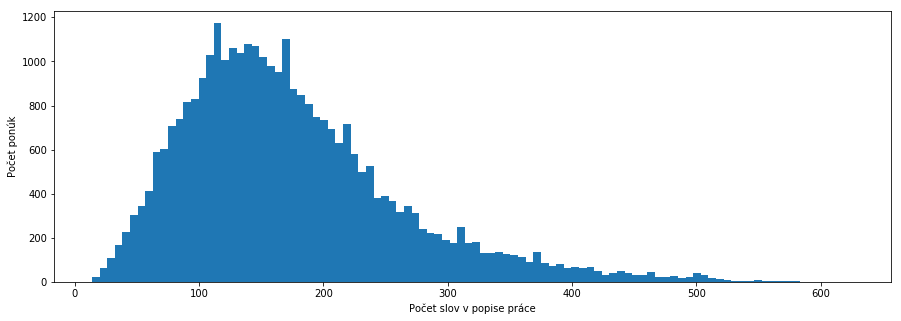

In [25]:
import matplotlib.pyplot as plt

seq_lens = [len(row) for row in sequences_train]
print('min:', min(seq_lens),', max:', max(seq_lens),', avg:', np.mean(seq_lens))
plt.figure(figsize=(15,5))
plt.ylabel("Počet ponúk")
plt.xlabel("Počet slov v popise práce")

_ = plt.hist(seq_lens, bins=100)

Z grafu vyššie vidno, že väčšina popisov práce je reprezentovaná vektorom veľkosti do 500(tokenov - slov). Preto pomocou funkcie pad_sequences sa orežú všetky vektory väčšie ako 500. Tie kratšie sa doplnia nulami.

In [26]:
from keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = 500

x_train_pad = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
x_val_pad = pad_sequences(sequences_val, maxlen=MAX_SEQUENCE_LENGTH)
print(x_train_pad.shape, x_val_pad.shape)


(32000, 500) (8000, 500)
